In [0]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)
import keras    
from keras.models import Sequential
from keras.layers import Dense

2.2.0-rc4


Using TensorFlow backend.


In [0]:
#read the data. I have already standarized, SMOTETOMEK oversampled and randomly split the data to 72:25 proportion. 
train = pd.read_csv("/content/SMOTE_TRAIN.CSV")
test = pd.read_csv("/content/test.CSV")

In [0]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.011068,0.672004,-0.939272,-0.345831,0.736893,-0.194330,0.535538,0.249765,-0.455568,-0.961957,-0.120290,0.373784,0.646826,-0.492699,-0.008469,0.852534,-0.205100,1.943101,0.740871,-0.099216,0.451002,1.242712,-0.406219,-2.383611,-0.306647,-0.187582,-0.037876,0.056387,-0.200850,0
1,-0.171802,0.667620,0.842058,0.047052,-0.017893,-0.745167,0.544538,-0.034197,-0.273403,-0.453668,-0.313212,-0.410203,-0.501314,-0.321761,1.051917,0.471795,0.048778,-0.073011,-0.104557,0.096887,-0.370656,-1.020303,-0.018123,0.515668,-0.347139,0.154590,0.594596,0.298501,-0.345702,0
2,-0.126808,0.499145,0.124836,-0.508023,0.152991,-0.616567,0.617461,0.069294,0.176808,0.105910,0.555975,-0.223779,-2.180824,0.691689,-0.892594,0.113695,-0.545502,-0.154879,0.104938,-0.054082,-0.344201,-0.843687,0.179235,-0.081430,-1.081149,0.275481,0.841665,0.438428,-0.320195,0
3,-0.020276,0.353251,-0.098430,-0.417469,0.744346,-0.046613,0.636477,-0.005219,-0.013437,-0.326958,-0.263258,0.102974,-0.750200,0.546796,-0.504828,-0.035562,-0.928253,0.470463,1.382165,-0.233855,-0.250802,-0.699250,-0.010929,-2.006373,-0.701570,-1.115319,-0.090285,0.136319,-0.316058,0
4,-2.470840,2.030383,-2.060765,-0.159184,-1.545050,-0.935953,-1.128701,1.885118,0.135228,0.183920,-1.935139,0.715385,-0.463997,1.952669,-0.411245,0.197632,1.164980,-0.654293,0.573042,-1.492274,0.245561,-0.415914,0.828651,-0.030070,-1.700655,0.060414,-6.562047,-1.718740,-0.234995,0


We have 29 predictor variables and 1 binary target variable in the last column of our datasets.

In [0]:
#convert the data into features and labels. Then, convert the features and labels to numpy arrays.
X_train = train.iloc[:, :-1].values
y_train = train['Class'].values
X_test = test.iloc[:, :-1].values
y_test = test['Class'].values

Build a keras model. We are using binary crossentropy as the error metric and sgd as the optimizer. I have built 4 hidden fully connected layers besides the input and output layers. I used sigmoid activation function for the output layer because the target class is binary. I ran the model for 10 epochs

In [0]:
#initialize with sequential
model = Sequential()

#add a fully connected layer with 100 neurons
model.add(Dense(100, activation='relu', input_shape=(29,)))

#add another fully connected layer with 100 neurons
model.add(Dense(100, activation='relu'))

#add another fully connected layer with 85 neurons
model.add(Dense(85, activation='relu'))

#add another fully connected layer with 50 neurons
model.add(Dense(50, activation='relu'))

#add another fully connected layer with 12 neurons
model.add(Dense(12, activation='relu'))

#add an output layer with 1 neuron and use sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

#compile the model
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train,epochs=10, batch_size=1, validation_data=(X_test, y_test), verbose=1)

Train on 426472 samples, validate on 71202 samples
Epoch 1/10
426472/426472 [==============================] - 554s 1ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0083 - val_accuracy: 0.9984
Epoch 2/10
426472/426472 [==============================] - 559s 1ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0090 - val_accuracy: 0.9983
Epoch 3/10
426472/426472 [==============================] - 556s 1ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0152 - val_accuracy: 0.9968
Epoch 4/10
426472/426472 [==============================] - 556s 1ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0067 - val_accuracy: 0.9989
Epoch 5/10
426472/426472 [==============================] - 556s 1ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0072 - val_accuracy: 0.9987
Epoch 6/10
426472/426472 [==============================] - 559s 1ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0073 - val_accuracy: 0.9990
Epoch 7/10
426472/426472 [=======================

In [0]:
#calculate the training and validation errors
scores_train = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}%'.format(scores_train[1], 1 - scores_train[1]))   
 
scores_test = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}%'.format(scores_test[1], 1 - scores_test[1]))   

Accuracy on training data: 0.9992777705192566% 
 Error on training data: 0.0007222294807434082
Accuracy on test data: 0.9987781047821045% 
 Error on test data: 0.0012218952178955078


Define a function to plot the history of validation accuracy and validation loss for the epochs run.

In [0]:
plt.style.use('ggplot')

def plot_performance_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

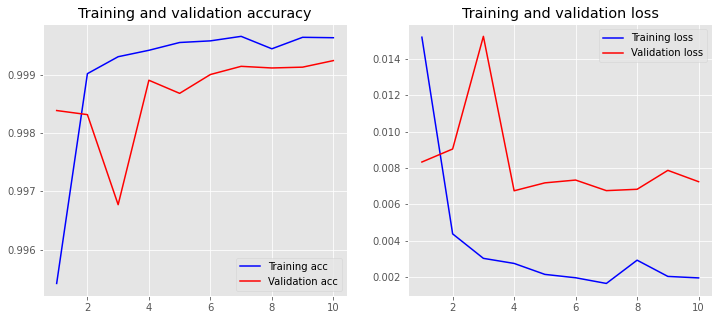

In [0]:
plot_performance_history(history)

From the above graphs, it seems that the training and validation accuracy started entering a plateau phase after 6 epochs. The validation accuracy is 99.92% and training accuracy is 99.96%. There is not much of a difference and the model is not overfitting. 

We may get even more accuracy but I think this is enough given the computational cost.